In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [15]:
def f1(t,y):
    return y - t

def euler(f,t0,y0,tf,numSteps):
    y = np.zeros(numSteps)
    t = np.zeros(numSteps)
    t[0],y[0] = t0,y0
    
    dt = (tf-t0)/numSteps
    for n in range(0,numSteps-1):
        y[n+1] = y[n] + dt*f(t[n],y[n])
        t[n+1] = t[n] + dt
    return t,y

def predCorrect(f,t0,y0,tf,numSteps):
    y = np.zeros(numSteps)
    t = np.zeros(numSteps)
    t[0],y[0] = t0,y0
    
    dt = (tf-t0)/numSteps
    for n in range(0,numSteps-1):
        y[n+1] = y[n] + dt*f(t[n],y[n])
        y[n+1] = y[n] + dt/2*(f(t[n],y[n]) + f(t[n]+dt,y[n+1]))
        t[n+1] = t[n] + dt
    return t,y

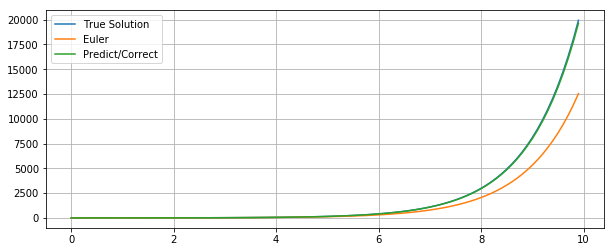

680.017276922951

In [37]:
t0,tf = 0,10
y0 = 2

N = 100

t,y = euler(f1,t0,y0,tf,N)
t,y2 = predCorrect(f1,t0,y0,tf,N)

yTrue = np.exp(t) + t + 1
plt.figure(figsize=(10,4))
plt.plot(t,yTrue)
plt.plot(t,y,markersize = 6)
plt.plot(t,y2,markersize = 5)
plt.legend(['True Solution','Euler','Predict/Correct'])
plt.grid()
plt.show()

np.linalg.norm(yTrue-y2)